<a href="https://colab.research.google.com/github/tera90223/random-walk-roomba-simulation/blob/main/MIT_Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Mount Google Drive to access problem set
from google.colab import drive
#drive.mount('/content/drive')

# Problem Set 3: Robot Simulation

## Problem 1: Implementing the RectangularRoom and Robot Abstract Classes

### Understanding Abstract Class in This Simulation

In object-oriented programming, an **abstract class** is a blueprint for other classes. It defines shared attributes and method signatures and leaves the actual implementation of certain methods to its subclasses.

Think of it like a contract:

> “Any class that inherits from me must implement these specific methods.”

You cannot create an instance of an abstract class directly. It exists to enforce structure, provide shared logic, and guide consistent subclass design.

#### Why Use Abstract Classes?
Abstract classes are powerful in simulations like this one because they let you:

* **Define shared behavior** (e.g., how to check if a position is in the room)
* **Enforce required methods** (e.g., update_position_and_clean)
* **Avoid duplicate code** while still allowing variety (e.g., different robot movement strategies)

For example:

* Every Robot has a position, direction, speed, and cleaning capacity.
* But not every robot moves the same way, so the movement logic is left abstract.

#### In This Project

* `RectangularRoom` provides the shared structure for room types but doesn't decide whether a room has furniture.
* `Robot` ensures all robots track position and clean tiles, but lets subclasses like `StandardRobot` or `FaultyRobot` define how they move and clean.

This design made the project modular and extensible which is ideal for comparing different movement and cleaning strategies without rewriting shared code.

In [43]:
# -*- coding: utf-8 -*-
# Problem Set 3: Simulating robots
# Name: Chantera Lazard
# Time: 4 hours

import math
import random

import pylab

In [44]:
# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room, where
    coordinates are given by floats (x, y).
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    def get_new_position(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: float representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.get_x(), self.get_y()

        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))

        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y

        return Position(new_x, new_y)

    def __str__(self):
        return "Position: " + str(math.floor(self.x)) + ", " + str(math.floor(self.y))


In [45]:
# === Problem 1
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. Each tile
    has some fixed amount of dirt. The tile is considered clean only when the amount
    of dirt on this tile is 0.
    """
    def __init__(self, width, height, dirt_amount):
        """
        Initializes a rectangular room with the specified width, height, and
        dirt_amount on each tile.

        width: an integer > 0
        height: an integer > 0
        dirt_amount: an integer >= 0
        """
        # Width of the Rectangular Room
        self.width = width
        # Height of the Rectangular Room
        self.height = height
        # Initialize every tile with a certain amount of dirt
        self.tiles = {}
        for m in range(width):
            for n in range(height):
              self.tiles[(m,n)] = dirt_amount

    def clean_tile_at_position(self, pos, capacity):
        """
        Mark the tile under the position pos as cleaned by capacity amount of dirt.

        Assumes that pos represents a valid position inside this room.

        pos: a Position object
        capacity: the amount of dirt to be cleaned in a single time-step
                  can be negative which would mean adding dirt to the tile

        Note: The amount of dirt on each tile should be NON-NEGATIVE.
              If the capacity exceeds the amount of dirt on the tile, mark it as 0.
        """
        # Use position to get tile coordinates
        m = int(pos.get_x())
        n = int(pos.get_y())

        # If robot's cleaning capacity exceeds the amount of dirt on tile,
        # tile is cleaned
        dirt_amount = self.tiles[(m,n)]
        if dirt_amount - capacity < 0:
            self.tiles[(m,n)]= 0
        else:
            #  Subtract robot's cleaning capacity from amount of dirt on tile
            dirt_amount -= capacity
            self.tiles[(m,n)] = dirt_amount

    def is_tile_cleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer

        Returns: True if the tile (m, n) is cleaned, False otherwise

        Note: The tile is considered clean only when the amount of dirt on this
              tile is 0.
        """
        return self.tiles[(m,n)] == 0

    def get_num_cleaned_tiles(self):
        """
        Return the total number of clean tiles in the room.

        Returns: an integer
        """
        num_cleaned_tiles = 0
        # Check if each tile is cleaned (dirt_amount == 0)
        for tile in self.tiles:
            if self.tiles[tile] == 0:
                num_cleaned_tiles += 1
        return num_cleaned_tiles

    def is_position_in_room(self, pos):
        """
        Determines if pos is inside the room.

        pos: a Position object.
        Returns: True if pos is in the room, False otherwise.
        """
        x = pos.get_x()
        y = pos.get_y()
        if 0 <= x < (self.width) and 0 <= y < (self.height):
            return True
        else:
            return False

    def get_dirt_amount(self, m, n):
        """
        Return the amount of dirt on the tile (m, n)

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer

        Returns: an integer
        """
        return self.tiles[(m,n)]

    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room
        """
        # do not change -- implement in subclasses.

    def is_position_valid(self, pos):
        """
        pos: a Position object.

        returns: True if pos is in the room and (in the case of FurnishedRoom)
                 if position is unfurnished, False otherwise.
        """
        # do not change -- implement in subclasses

    def get_random_position(self):
        """
        Returns: a Position object; a random position inside the room
        """
        # do not change -- implement in subclasses

In [46]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times, the robot has a particular position and direction in the room.
    The robot also has a fixed speed and a fixed cleaning capacity.

    Subclasses of Robot should provide movement strategies by implementing
    update_position_and_clean, which simulates a single time-step.
    """
    def __init__(self, room, speed, capacity):
        """
        Initializes a Robot with the given speed and given cleaning capacity in the
        specified room. The robot initially has a random direction and a random
        position in the room.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        capacity: a positive interger; the amount of dirt cleaned by the robot
                  in a single time-step
        """
        self.room = room
        self.speed = speed
        self.capacity = capacity
        self.direction = random.random() * 360.0
        self.position = room.get_random_position()

    def get_robot_position(self):
        """
        Returns: a Position object giving the robot's position in the room.
        """
        return self.position

    def get_robot_direction(self):
        """
        Returns: a float d giving the direction of the robot as an angle in
        degrees, 0.0 <= d < 360.0.
        """
        return self.direction

    def set_robot_position(self, position):
        """
        Set the position of the robot to position.

        position: a Position object.
        """
        self.position = position

    def set_robot_direction(self, direction):
        """
        Set the direction of the robot to direction.

        direction: float representing an angle in degrees
        """
        self.direction = direction

    def update_position_and_clean(self):
        """
        Simulate the raise passage of a single time-step.

        Move the robot to a new random position (if the new position is invalid,
        rotate once to a random new direction, and stay stationary) and mark the tile it is on as having
        been cleaned by capacity amount.
        """
        # do not change -- implement in subclasses


## Problem 2: Implementing EmptyRoom and FurnishedRoom

### Notes on Room Inheritance & Design Decisions.

#### 1. `is_position_valid` as a Wrapper Method
The `is_position_valid` method serves as a wrapper around the more fundamental `is_position_in_room` method.

* `is_position_in_room` peforms a basic geometric check to ensure a position lies within the width and height boudnaries of the room.
* `is_position_valid` allows subclasses (like `FurnishedRoom`) to **customize position logic**, such as accounting furniture or obstacles.

This pattern demonstrates the power of method overriding to introduce class-specific behavior while preserving base functionality.



#### 2. Use of `RetangularRoom.__init__` vs `super()`

In the `FurnishedRoom` class, the parent constructor is called using:

```
RectangularRoom.__init__(self, width, height, dirt_amount)
```

While this works, a more modern and flexible approach in Python would be:

```
super().__init__(width, height, dirt_amount)
```

Using `super()`:
* Adheres to best practices
* Supports multiple inheritence scenarios
* Avoids hardcoding the parent class name

In Structured course settings, the explicit call to `RectangularRoom` may be preferred for clarity, but `super()` is generally recommended in professional Python code.

In [47]:
# === Problem 2
class EmptyRoom(RectangularRoom):
    """
    An EmptyRoom represents a RectangularRoom with no furniture.
    """
    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room
        """
        return self.width * self.height

    def is_position_valid(self, pos):
        """
        pos: a Position object.

        Returns: True if pos is in the room, False otherwise.
        """
        return self.is_position_in_room(pos)

    def get_random_position(self):
        """
        Returns: a Position object; a valid random position (inside the room).
        """
        x = random.random() * (self.width-1)
        y = random.random() * (self.height-1)
        return Position(x, y)

In [48]:
class FurnishedRoom(RectangularRoom):
    """
    A FurnishedRoom represents a RectangularRoom with a rectangular piece of
    furniture. The robot should not be able to land on these furniture tiles.
    """
    def __init__(self, width, height, dirt_amount):
        """
        Initializes a FurnishedRoom, a subclass of RectangularRoom. FurnishedRoom
        also has a list of tiles which are furnished (furniture_tiles).
        """
        # This __init__ method is implemented for you -- do not change.
        # Call the __init__ method for the parent class
        RectangularRoom.__init__(self, width, height, dirt_amount)
        # Adds the data structure to contain the list of furnished tiles
        self.furniture_tiles = []

    def add_furniture_to_room(self):
        """
        Add a rectangular piece of furniture to the room. Furnished tiles are stored
        as (x, y) tuples in the list furniture_tiles

        Furniture location and size is randomly selected. Width and height are selected
        so that the piece of furniture fits within the room and does not occupy the
        entire room. Position is selected by randomly selecting the location of the
        bottom left corner of the piece of furniture so that the entire piece of
        furniture lies in the room.
        """
        # This addFurnitureToRoom method is implemented for you. Do not change it.
        furniture_width = random.randint(1, self.width - 1)
        furniture_height = random.randint(1, self.height - 1)

        # Randomly choose bottom left corner of the furniture item.
        f_bottom_left_x = random.randint(0, self.width - furniture_width)
        f_bottom_left_y = random.randint(0, self.height - furniture_height)

        # Fill list with tuples of furniture tiles.
        for i in range(f_bottom_left_x, f_bottom_left_x + furniture_width):
            for j in range(f_bottom_left_y, f_bottom_left_y + furniture_height):
                self.furniture_tiles.append((i,j))

    def is_tile_furnished(self, m, n):
        """
        Return True if tile (m, n) is furnished.
        """
        if (m, n) in self.furniture_tiles:
          return True
        else:
          return False

    def is_position_furnished(self, pos):
        """
        pos: a Position object.

        Returns True if pos is furnished and False otherwise
        """
        m = int(pos.get_x())
        n = int(pos.get_y())
        if self.is_tile_furnished(m,n):
          return True
        else:
          return False

    def is_position_valid(self, pos):
        """
        pos: a Position object.

        returns: True if pos is in the room and is unfurnished, False otherwise.
        """
        if self.is_position_in_room(pos) and not self.is_position_furnished(pos):
          return True
        else:
          return False

    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room that can be accessed.
        """
        return self.width * self.height - len(self.furniture_tiles)

    def get_random_position(self):
        """
        Returns: a Position object; a valid random position (inside the room and not in a furnished area).
        """
        # This starts an infinite loop that will return position when criteria
        # is met
        while True:
          x = random.random() * (self.width-1)
          y = random.random() * (self.height-1)
          pos = Position(x, y)
          if self.is_position_valid(pos):
            return pos


# Problem 3: StandardRobot and Simulating a Timestep

In [49]:
# === Problem 3 (20 minutes)
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall or furtniture, it *instead*
    chooses a new direction randomly.
    """
    def update_position_and_clean(self):
        """
        Simulate the raise passage of a single time-step.

        Move the robot to a new random position (if the new position is invalid,
        rotate once to a random new direction, and stay stationary) and clean the dirt on the tile
        by its given capacity.
        """
        # Get current poisition and direction
        current_position = self.get_robot_position()
        current_direction = self.get_robot_direction()

        # Get new position
        new_position = current_position.get_new_position(current_direction, \
                                                         self.speed)
        # Check if new position is a valid position in the room
        if self.room.is_position_valid(new_position):
          # Move robot to valid position and clean tile
          self.set_robot_position(new_position)
          self.room.clean_tile_at_position(new_position, self.capacity)
        else:
          # If position is invalid, change to a random direction
          self.set_robot_direction(random.random() * 360.0)

## Problem 4: Implementing FaultyRobot

In [88]:
# === Problem 4
class FaultyRobot(Robot):
    """
    A FaultyRobot is a robot that will not clean the tile it moves to and
    pick a new, random direction for itself with probability p rather
    than simply cleaning the tile it moves to.
    """
    p = 0.15

    @staticmethod
    def set_faulty_probability(prob):
        """
        Sets the probability of getting faulty equal to PROB.

        prob: a float (0 <= prob <= 1)
        """
        FaultyRobot.p = prob

    def gets_faulty(self):
        """
        Answers the question: Does this FaultyRobot get faulty at this timestep?
        A FaultyRobot gets faulty with probability p.

        returns: True if the FaultyRobot gets faulty, False otherwise.
        """
        return random.random() < FaultyRobot.p

    def update_position_and_clean(self):
        """
        Simulate the passage of a single time-step.

        Check if the robot gets faulty. If the robot gets faulty,
        do not clean the current tile and change its direction randomly.

        If the robot does not get faulty, the robot should behave like
        StandardRobot at this time-step (checking if it can move to a new position,
        move there if it can, pick a new direction and stay stationary if it can't)
        """
        # Get current poisition and direction
        current_position = self.get_robot_position()
        current_direction = self.get_robot_direction()

        # Check if robot gets faulty
        if self.gets_faulty():
          self.set_robot_direction(random.random() * 360.0)
          return

        # Get new position
        new_position = current_position.get_new_position(current_direction, \
                                                         self.speed)
        # Check if new position is a valid position in the room and
        # it is not faulty
        if self.room.is_position_valid(new_position) and not self.gets_faulty():
          self.set_robot_position(new_position)
          self.room.clean_tile_at_position(new_position, self.capacity)
        else:
          # If position is invalid or faulty, change to a random direction
          self.set_robot_direction(random.random() * 360.0)

## Visualizing the Robot

MIT provided a Visualizing class but unfortunately Google Colab does not support Tkinter-based GUIs, so I had to rewrite the visualizer using `matplotlib` for frame-by-frame rendering. It foced me to understand how each visual element maps to simulation logic, like furniture coloring, cleaning status, and coordinate system. This turned out to be one of the most valuable learning points in this step.

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, clear_output
import time
import os
from PIL import Image

class ColabRobotVisualizer:
  """
   A Colab-friendly visualization tool for simulating cleaning robots.

    This class replaces the original Tkinter-based RobotVisualization, enabling
    animated plotting within Jupyter or Google Colab notebooks using matplotlib.

    Attributes:
        num_robots (int): Number of robots to simulate.
        width (int): Width of the room in tiles.
        height (int): Height of the room in tiles.
        furniture_tiles (set): Set of (m, n) tile coordinates that are furnished.
        delay (float): Time delay (in seconds) between frames for animation pacing.
        save_frames (bool): Whether to save frames for GIF generation.
        frames_dir (str): Directory where frames are stored for the GIF.
        time (int): Current timestep in the simulation.
  """
  def __init__(self, num_robots, width, height, furniture_tiles=[], delay=0.3,\
                 save_frames=False):
      """
      Initializes the visualizer with room and robot settings.
      Optionally supports saving frames for GIF creation.

      Args:
          num_robots (int): Number of robots in the simulation.
          width (int): Room width in tiles.
          height (int): Room height in tiles.
          furniture_tiles (list): List of furnished tiles.
          delay (float): Delay between frames.
          save_frames (bool): If True, save frames for a final GIF.
      """
      self.num_robots = num_robots
      self.width = width
      self.height = height
      self.tiles = {}
      # Number of seconds to pause after each frame
      self.delay = delay
      self.furniture_tiles = set(furniture_tiles)
      self.time = 0

      # Save Frames for gif
      self.save_frames = save_frames
      self.frames = []
      self.frames_dir = "robot_frames"

      if self.save_frames:
        os.makedirs(self.frames_dir, exist_ok=True)
        # Clean up old frames only if directory isn't empty
        for item in os.listdir(self.frames_dir):
          item_path = os.path.join(self.frames_dir, item)
          if os.path.isfile(item_path):
            os.remove(item_path)

      # Set up the plotting figure
      self.fig, self.ax = plt.subplots(figsize=(6, 6))

  def update(self, room, robots):
    """
    Renders the current state of the room and robots.

    Args:
        room (Room): Room object containing dirt/furniture state.
        robots (list): List of robot objects with position/direction.
    """
    if not hasattr(self, 'dirt_amount'):
      # Assumes uniform starting dirt amount
      self.dirt_amount = room.get_dirt_amount(0,0)

    self.ax.clear()
    self.ax.set_xlim(0, self.width)
    self.ax.set_ylim(0, self.height)
    self.ax.set_aspect('equal')
    self.ax.set_xticks(range(self.width+1))
    self.ax.set_yticks(range(self.height+1))
    self.ax.grid(True)
    self.ax.set_title(f"Time Step: {self.time}, \
    Cleaned: {room.get_num_cleaned_tiles()} / {room.get_num_tiles()}")

    # Draw room tiles
    for i in range(self.width):
        for j in range(self.height):
            if (i, j) in self.furniture_tiles:
                color = 'red'
            elif not room.is_tile_cleaned(i,j):
              dirt = room.get_dirt_amount(i,j)
              brightness = 1.0 - (dirt/self.dirt_amount)
              color = (brightness, brightness, brightness)
            else:
                color = 'white'
            rect = patches.Rectangle((i, j), 1, 1, facecolor=color)
            self.ax.add_patch(rect)

    # Draw robots
    for robot in robots:
        dir = math.radians(robot.get_robot_direction())
        pos = robot.get_robot_position()
        x, y = pos.get_x(), pos.get_y()

        # Draw Directional arrow to indicate robot facing
        dx = 0.5* math.sin(dir)
        dy = 0.5* math.cos(dir)
        self.ax.arrow(x, y, dx, dy, head_width=0.1, color="purple")

        # Draw robot body, change color if faulty
        color = 'blue'
        if hasattr(robot, 'gets_faulty') and robot.gets_faulty():
          color = 'orange'
          print(f"Robot at ({x:.2f}, {y:.2f}) is faulty this step!")
        circle = plt.Circle((x,y), 0.3, color = color)
        self.ax.add_patch(circle)

    # Save frames in a folder (if enabled)
    if self.save_frames and len(robots) > 0:
      frame_path = f"{self.frames_dir}/frame_{self.time:04d}.png"
      self.fig.savefig(frame_path)
      self.frames.append(frame_path)

    clear_output(wait=True)
    display(self.fig)
    time.sleep(self.delay)
    self.time += 1
    plt.close()

  def done(self, tag=""):
    """
    Finalizes the simulation. If saving is enabled, generates a GIF.

    Args:
        tag (str): Optional label for the saved GIF filename.
    """
    if self.save_frames:
      self._generate_gif(tag)

  def _generate_gif(self, tag=""):
    """
    Compiles saved frames into a GIF.

    Args:
        tag (str): Optional suffix for the saved GIF filename.
    """
    images = []
    frame_files = sorted(os.listdir(self.frames_dir))
    for filename in frame_files:
      if filename.endswith(".png"):
        filepath = os.path.join(self.frames_dir, filename)
        images.append(Image.open(filepath))

    if not images:
      print("No images found for GIF generation.")
      return

    tag_suffix= f"_{tag.lower()}" if tag else ""
    gif_path = f"robot_simulation{tag_suffix}.gif"
    images[0].save(gif_path, save_all=True, append_images=images[1:], \
                    duration=100, loop=0)
    print(f"GIF saved to {gif_path}")


In [89]:
def test_robot_movement(robot_type, room_type):
    # Initialize room
    room = room_type(5, 5, 4)
    is_furnished = isinstance(room, FurnishedRoom)

    if is_furnished:
      room.add_furniture_to_room()
      furniture_tiles = room.furniture_tiles
    else:
      furniture_tiles = []

    # Initialize robots and visualizer
    robots = [robot_type(room, 1, 1)]
    anim = ColabRobotVisualizer(num_robots=1, width=5, height=5,\
                                furniture_tiles=furniture_tiles, save_frames=True)
    # Run simulation loop
    coverage = 0
    time_steps = 0
    min_coverage = 1.0

    while coverage < min_coverage:
        time_steps += 1
        for robot in robots:
            robot.update_position_and_clean()

        coverage = float(room.get_num_cleaned_tiles())/room.get_num_tiles()
        anim.update(room, robots)
    anim.done('faulty')
    print(f"Simulation complete in {time_steps} time steps.")


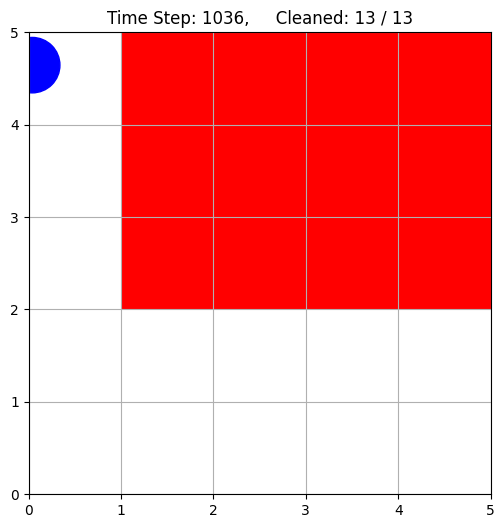

GIF saved to robot_simulation_<class '__main__.furnishedroom'>.gif
Simulation complete in 1037 time steps.


In [85]:
# StandardRobot in action!
test_robot_movement(StandardRobot, EmptyRoom)
test_robot_movement(StandardRobot, FurnishedRoom)

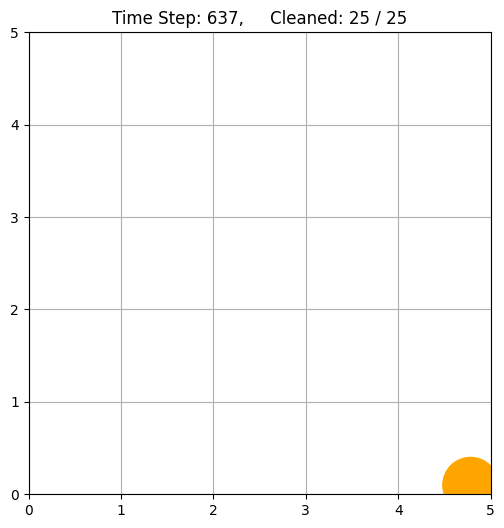

GIF saved to robot_simulation_faulty.gif
Simulation complete in 638 time steps.


In [90]:
# Faulty Robot in Action
test_robot_movement(FaultyRobot, EmptyRoom)

In [93]:
# Download Files
from google.colab import files
files.download("robot_simulation_emptyroom.gif")
files.download("robot_simulation_furnishedroom.gif")
files.download("robot_simulation_faulty.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Appendix:

### Problem 5: Creating the Simulator
This function runs multiple trials to calculate the average number of time steps needed to reach a target coverage level. It was primarily used for performance comparison across robot types in larger simulations (e.g. Subproblem 6).

Note: I chose not to focus on this section, despite building it out. It was more about batch execution, and I wanted to focus on random walks. Leaving it here for completeness.

In [ ]:
# === Problem 5
def run_simulation(num_robots, speed, capacity, width, height, dirt_amount, min_coverage, num_trials,
                  robot_type):
    """
    Runs num_trials trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction min_coverage of the room.

    The simulation is run with num_robots robots of type robot_type, each
    with the input speed and capacity in a room of dimensions width x height
    with the dirt dirt_amount on each tile.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    capacity: an int (capacity >0)
    width: an int (width > 0)
    height: an int (height > 0)
    dirt_amount: an int
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                FaultyRobot)
    """
    # Initialize a variable to accumulate total time steps across all trials
    total_time_steps = 0

    # For each trial or simulation...
    for trial in range(num_trials):
      # Initialize a variable to count time steps and coverage
      time_steps = 0
      coverage = 0

      # Visualize the trial
      anim = ColabRobotVisualizer(num_robots=num_robots, \
                                  width=width, \
                                  height=height)

      # Instantiate an Empty Room Object with uniformed dirt amount
      room = EmptyRoom(width=width, height=height, dirt_amount=dirt_amount)

      # Instantiate a list of Robots with the given speed and capacity
      robots = []
      for robot in range(num_robots):
        robot = robot_type(room, speed, capacity)
        robots.append(robot)

      # Continue simulation until the required fractionof the room is clean
      while coverage < min_coverage:
        for robot in robots:
          robot.update_position_and_clean()
        # Increment the time step after all robots have moved
        time_steps += 1
        # Calculate current coveragve of cleaned tiles
        coverage = float(room.get_num_cleaned_tiles()/room.get_num_tiles())
        anim.update(room, robots)
      # Add the total time for this trial to the aggregate
      total_time_steps += time_steps

    # Return the average number of time steps across all trials
    return total_time_steps/num_trials

# print ('avg time steps: ' + str(run_simulation(3, 1.0, 1, 5, 5, 3, 1.0, 3, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 10, 10, 3, 0.8, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 10, 10, 3, 0.9, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 20, 20, 3, 0.5, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(3, 1.0, 1, 20, 20, 3, 0.5, 50, StandardRobot)))


### Problem 6: Running the Simulator

In [ ]:
# === Problem 6
#
# ANSWER THE FOLLOWING QUESTIONS:
#
# 1)How does the performance of the two robot types compare when cleaning 80%
#       of a 20x20 room?
#
#
# 2) How does the performance of the two robot types compare when two of each
#       robot cleans 80% of rooms with dimensions
#       10x30, 20x15, 25x12, and 50x6?
#
#

def show_plot_compare_strategies(title, x_label, y_label):
    """
    Produces a plot comparing the two robot strategies in a 20x20 room with 80%
    minimum coverage.
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print ("Plotting", num_robots, "robots...")
        times1.append(run_simulation(num_robots, 1.0, 1, 20, 20, 3, 0.8, 20, StandardRobot))
        times2.append(run_simulation(num_robots, 1.0, 1, 20, 20, 3, 0.8, 20, FaultyRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'FaultyRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

def show_plot_room_shape(title, x_label, y_label):
    """
    Produces a plot showing dependence of cleaning time on room shape.
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300/width
        print ("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, StandardRobot))
        times2.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, FaultyRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'FaultyRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()


#show_plot_compare_strategies('Time to clean 80% of a 20x20 room, for various numbers of robots','Number of robots','Time / steps')
#show_plot_room_shape('Time to clean 80% of a 300-tile room for various room shapes','Aspect Ratio', 'Time / steps')
